In [36]:
import util
import analysis
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [48]:
reload(util)
#
symbols =  ['FB']
util.update_data(symbols)
print "done"

done


<IPython.core.display.Javascript object>


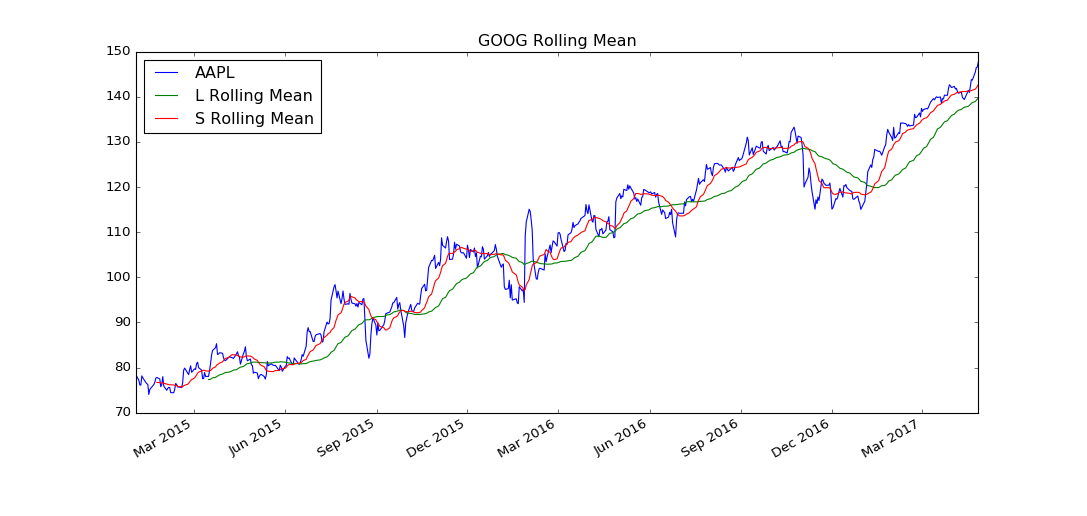

In [49]:
syms=['FB']
sd = dt.datetime(2015,1,1)
ed = dt.datetime(2017,12,31)
dates = pd.date_range(sd, ed)
prices_all = util.get_data(syms, dates)  # automatically adds SPY
df = prices_all['FB']
ax=df.plot(title='GOOG Rolling Mean', label='AAPL',color='b',linewidth=1)
lsma = df.rolling(50).mean()
ssma = df.rolling(15).mean()
lsma.plot(label='L Rolling Mean', color='g', ax=ax, linewidth=1)
ssma.plot(label='S Rolling Mean', color='r', ax=ax, linewidth=1)
ax.legend(loc='upper left')


Start Date: 2014-06-30 00:00:00
End Date: 2014-08-30 00:00:00
Symbols: ['GOOG']
Allocations: [1]
Sharpe Ratio: -0.122869545976
Volatility (stdev of daily returns): 0.0112829141271
Average Daily Return: -8.73303631049e-05
Cumulative Return: -0.00639688035344
End Value: 25833.6811108


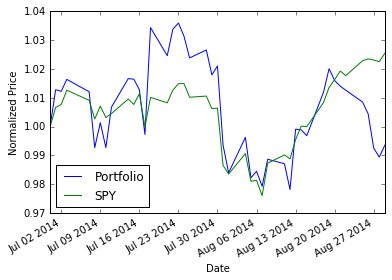

In [31]:
reload(analysis)

symbols =  ['GOOG']
start_date = dt.datetime(2014,6,30)
end_date = dt.datetime(2014,8,30)
allocations =[  1]
start_val = 26000  
risk_free_rate = 0.0
sample_freq = 252

    # Assess the portfolio
cr, adr, sddr, sr, ev = analysis.assess_portfolio(sd = start_date, ed = end_date,\
    syms = symbols, \
    allocs = allocations,\
    sv = start_val, \
    gen_plot = True)

# Print statistics
print "Start Date:", start_date
print "End Date:", end_date
print "Symbols:", symbols
print "Allocations:", allocations
print "Sharpe Ratio:", sr
print "Volatility (stdev of daily returns):", sddr
print "Average Daily Return:", adr
print "Cumulative Return:", cr
print "End Value:", ev

In [25]:
def test_calendar(year):
    symbols =  ['GOOG']
    start_date = dt.datetime(year,4,7)
    end_date = dt.datetime(year,7,30)
    allocations =[  1]
    start_val = 26000  
    risk_free_rate = 0.0
    sample_freq = 252

    # Assess the portfolio
    cr, adr, sddr, sr, ev = analysis.assess_portfolio(sd = start_date, ed = end_date,\
    syms = symbols, \
    allocs = allocations,\
    sv = start_val, \
    gen_plot = False)

    # Print statistics
    print "Start Date:", start_date
    print "End Date:", end_date
    print "Symbols:", symbols
    print "Allocations:", allocations
    print "Sharpe Ratio:", sr
    print "Volatility (stdev of daily returns):", sddr
    print "Average Daily Return:", adr
    print "Cumulative Return:", cr
    print "End Value:", ev

In [26]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(test_calendar, year=(2005,2017));

Start Date: 2005-04-07 00:00:00
End Date: 2005-07-30 00:00:00
Symbols: ['SPY']
Allocations: [1]
Sharpe Ratio: 1.25855187843
Volatility (stdev of daily returns): 0.00685199319998
Average Daily Return: 0.000543235039816
Cumulative Return: 0.0419272850122
End Value: 27090.1094103


Start Date: 2017-01-01 00:00:00
End Date: 2017-03-31 00:00:00
Symbols: ['FDMO']
Allocations: [ 1.]
Sharpe Ratio: 3.22342891356
Volatility (stdev of daily returns): 0.00538084713615
Average Daily Return: 0.00109261832771
Cumulative Return: 0.0668042285394


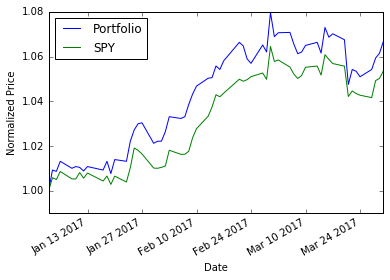

In [31]:
import analysis
reload(analysis)

start_date = dt.datetime(2017,1,1)
end_date = dt.datetime(2017,3,31)
symbols =  ['FDMO']

# Assess the portfolio
allocations, cr, adr, sddr, sr = analysis.optimize_portfolio(sd = start_date, ed = end_date,\
        syms = symbols, \
        gen_plot = True)
  # Print statistics
print "Start Date:", start_date
print "End Date:", end_date
print "Symbols:", symbols
print "Allocations:", allocations
print "Sharpe Ratio:", sr
print "Volatility (stdev of daily returns):", sddr
print "Average Daily Return:", adr
print "Cumulative Return:", cr



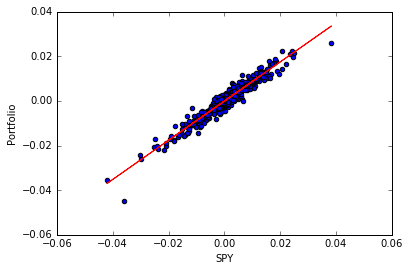

Beta 0.877009967935, Alpha -0.000102170506322
Correlation:
           Portfolio       SPY
Portfolio   1.000000  0.967096
SPY         0.967096  1.000000
Sharpe Ratio:
Portfolio    0.496345
SPY          0.728229
dtype: float64


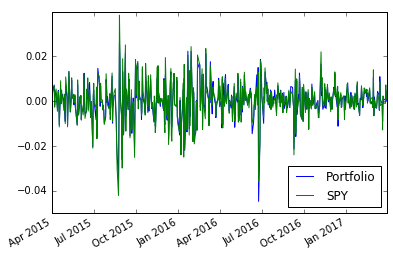

In [23]:
dates = pd.date_range(start_date, end_date)
prices_all = util.get_data(symbols, dates)  # automatically adds SPY
prices = prices_all[symbols]  # only portfolio symbols
prices_SPY= prices_all['SPY']

normed = prices /prices.ix[0]
alloced = normed * allocations
pos_vals = alloced * 1
portfolio = pos_vals.sum(axis=1)

prices_SPY = prices_SPY/prices_SPY.ix[0]

daily_returns = portfolio.copy()
daily_returns= pd.concat([portfolio, prices_SPY], keys=['Portfolio', 'SPY'], axis=1)
daily_returns[1:] = (daily_returns[1:] / daily_returns[:-1].values) -1
daily_returns.ix[0]=0

daily_returns.plot(kind='scatter', x='SPY', y='Portfolio')

beta,alpha = np.polyfit(daily_returns['SPY'],daily_returns['Portfolio'],1)
plt.plot(daily_returns['SPY'], beta * daily_returns['SPY'] + alpha, '-', color='r')

plt.show()
print "Beta {}, Alpha {}".format(beta, alpha)
print "Correlation:\n",daily_returns.corr(method='pearson')
print "Sharpe Ratio:\n",np.sqrt(252) * (daily_returns.mean()/ daily_returns.std())

daily_returns.plot()

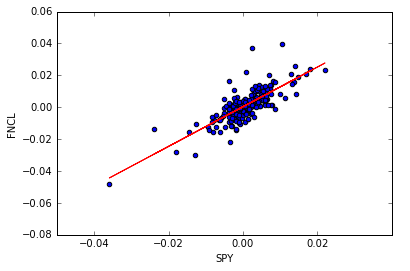

Beta [ 1.24410805], Alpha [ 0.00032809]
Correlation: 
           SPY      FNCL
SPY   1.000000  0.781752
FNCL  0.781752  1.000000


In [9]:
import analysis
reload(analysis)
start_date = dt.datetime(2016,6,1)
end_date = dt.datetime(2017,3,31)


# Assess the portfolio
beta, alpha, corr = analysis.ab_risk_ratio(sd = start_date, ed = end_date,\
        sym = ['FNCL'], \
        gen_plot = True)
print "Beta {}, Alpha {}".format(beta, alpha)
print "Correlation: \n",corr

In [40]:
((109 * .8) + 80)* 1.07   

178.904